Sample code for computing Performance Profiles for different methods on the Arcade Learning Environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def t_stat_perf_prof(data_means,data_std,data_n,data_names,tau_min=0.1,tau_max=8.0,npts=100):
    num_prob, num_method = data_means.shape
    t_stat = np.zeros((num_prob,num_method))
    rho = np.zeros((npts,num_method))
    
    for prob in range(num_prob):
        best_idx = np.argmax(data_means[prob,:])
        
        target_score = data_means[prob,best_idx]
        target_se_sq = data_std[prob,best_idx]**2/data_n[prob,best_idx]
        
        for method in range(num_method):
            t_stat[prob,method] = ((target_score-data_means[prob,method])
                                   /np.sqrt(target_se_sq+data_std[prob,method]**2/data_n[prob,method]))

    tau = np.linspace(tau_min,tau_max,npts)
    for method in range(num_method):
        for k in range(npts):
            rho[k,method] = np.sum(t_stat[:,method]<tau[k])/num_prob
    
    # make plot
    colors = [ '#2D328F', '#F15C19',"#81b13c","#ca49ac","000000"]
    label_fontsize = 18
    tick_fontsize = 14
    linewidth = 3
    
    for method in range(num_method):
        plt.plot(tau,rho[:,method],color=colors[method],linewidth=linewidth,label=data_names[method])
        
    plt.xlabel(r'$\tau$',fontsize=label_fontsize)
    plt.ylabel(r'fraction with t-stat < $\tau$',fontsize=label_fontsize)
    plt.legend(fontsize=label_fontsize)
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    plt.grid(True)
    plt.show()

The data comes from the Tables 8 and 9 from paper “Revisiting the Arcade Learning Environment: Evaluation Protocols and Open Problems for General Agents.” https://arxiv.org/abs/1709.06009

The DQN data is in [this csv.](http://www.argmin.net/code/dqn.csv)
The Blob-PROST data is in [this csv.](http://www.argmin.net/code/blob.csv)

In [3]:
blob_data = np.genfromtxt('blob.csv', delimiter=',')
dqn_data = np.genfromtxt('dqn.csv', delimiter=',')

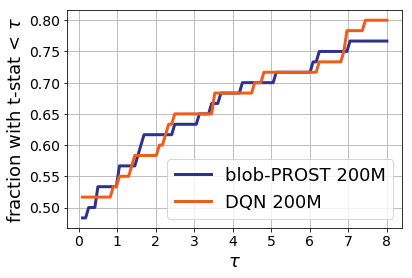

In [4]:
data_means = np.vstack((blob_data[:,6],dqn_data[:,6])).T
data_std = np.vstack((blob_data[:,7],dqn_data[:,7])).T + 1.0e-6
data_n = np.tile(np.array([24,5]).T,[60,1])
data_names = ['blob-PROST 200M','DQN 200M']
t_stat_perf_prof(data_means,data_std,data_n,data_names)

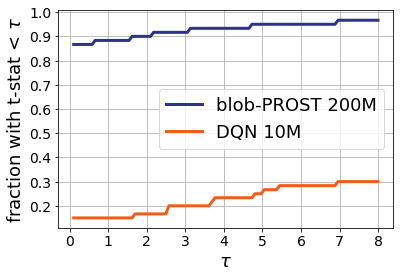

In [5]:
data_means = np.vstack((blob_data[:,6],dqn_data[:,0])).T
data_std = np.vstack((blob_data[:,7],dqn_data[:,1])).T + 1.0e-6
data_n = np.tile(np.array([24,5]).T,[60,1])
data_names = ['blob-PROST 200M','DQN 10M']
t_stat_perf_prof(data_means,data_std,data_n,data_names)

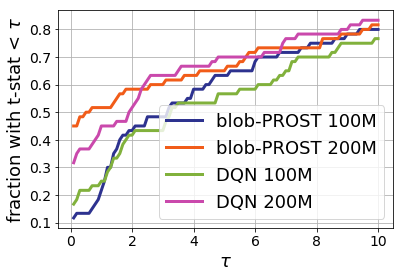

In [6]:
data_means = np.vstack((blob_data[:,4],blob_data[:,6],dqn_data[:,4],dqn_data[:,6])).T
data_std = np.vstack((blob_data[:,5],blob_data[:,7],dqn_data[:,5],dqn_data[:,7])).T + 1.0e-6
data_n = np.tile(np.array([24,24,5,5]).T,[60,1])
data_names = ['blob-PROST 100M','blob-PROST 200M','DQN 100M','DQN 200M']
t_stat_perf_prof(data_means,data_std,data_n,data_names,tau_min=0.1,tau_max=10)

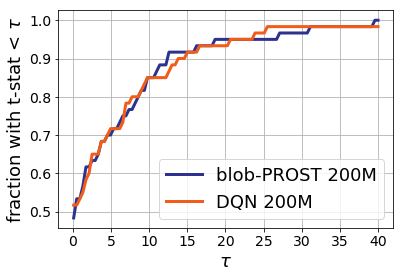

In [7]:
data_means = np.vstack((blob_data[:,6],dqn_data[:,6])).T
data_std = np.vstack((blob_data[:,7],dqn_data[:,7])).T + 1.0e-6
data_n = np.tile(np.array([24,5]).T,[60,1])
data_names = ['blob-PROST 200M','DQN 200M']
t_stat_perf_prof(data_means,data_std,data_n,data_names,tau_min=0.1,tau_max=40)

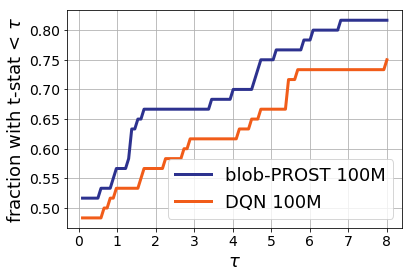

In [8]:
data_means = np.vstack((blob_data[:,4],dqn_data[:,4])).T
data_std = np.vstack((blob_data[:,5],dqn_data[:,5])).T + 1.0e-6
data_n = np.tile(np.array([24,5]).T,[60,1])
data_names = ['blob-PROST 100M','DQN 100M']
t_stat_perf_prof(data_means,data_std,data_n,data_names)